# Digits recognition using Deep Learning
### Using Deep Learning to recognise hand-written digits. 

The project includes two trained models. One "naive" using a regular perceptron and the other using the Convolutional Neural Network

## Data preprocessing

In [ ]:
import tensorflow.keras as keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#importing MNIST dataset with handwritten digits 
from sklearn.datasets import fetch_openml
df = fetch_openml("mnist_784", version=1)

In [ ]:
#dividing dataset into data and target datasets
X, y = np.array(df["data"]), np.array(df["target"])
X.shape, y.shape

((70000, 784), (70000,))

In [ ]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
y

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [ ]:
#y data are str type, let's transform it
print(type(y[0]))
y = y.astype("uint8")
print(type(y[0]))

<class 'str'>
<class 'numpy.uint8'>


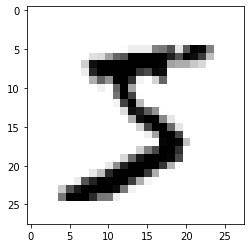

In [ ]:
#showing sample image of number
plt.imshow(X[0].reshape(28,28), cmap = "binary")
plt.show()

In [ ]:
#scale data between 0 and 1
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [ ]:
#splitting datasets into train and test sets
from sklearn.model_selection import train_test_split
X_train_full, X_test, y_train_full, y_test = train_test_split(X,y, test_size=0.10, random_state=42)

In [ ]:
X_train_full.shape, y_train_full.shape

((63000, 784), (63000,))

In [ ]:
#validation set
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

## Building Convolutional neural network

In [ ]:
#reshaping data to be original image shape
X_train =X_train.reshape(-1, 28,28,1) 
X_test = X_test.reshape(-1, 28,28,1)
X_valid = X_valid.reshape(-1, 28,28,1)

In [ ]:
#building model
from keras.layers import (
    Conv2D,
    MaxPool2D,
    Flatten,
    Dropout,
    BatchNormalization,
)

model2 = Sequential([
    Conv2D(75, (3, 3), strides=1, padding="same", activation="relu", input_shape=(28, 28, 1)),
    BatchNormalization(),
    MaxPool2D((2, 2), strides=2, padding="same"),
    Conv2D(50, (3, 3), strides=1, padding="same", activation="relu"),
    Dropout(0.2),
    BatchNormalization(),
    MaxPool2D((2, 2), strides=2, padding="same"),
    Conv2D(25, (3, 3), strides=1, padding="same", activation="relu"),
    BatchNormalization(),
    MaxPool2D((2, 2), strides=2, padding="same"),
    Flatten(),
    Dense(units=512, activation="relu"),
    Dropout(0.3),
    Dense(units=10, activation="softmax")
])

In [ ]:
#all layers of the model 
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 75)        750       
                                                                 
 batch_normalization (BatchN  (None, 28, 28, 75)       300       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 75)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 50)        33800     
                                                                 
 dropout (Dropout)           (None, 14, 14, 50)        0         
                                                                 
 batch_normalization_1 (Batc  (None, 14, 14, 50)      

In [ ]:
model2.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [ ]:
#training model
history2= model2.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1813/1813 [==============================] - 14s 5ms/step - loss: 0.1737 - accuracy: 0.9469 - val_loss: 0.0650 - val_accuracy: 0.9808
Epoch 2/30
1813/1813 [==============================] - 8s 4ms/step - loss: 0.0664 - accuracy: 0.9796 - val_loss: 0.0530 - val_accuracy: 0.9854
Epoch 3/30
1813/1813 [==============================] - 8s 5ms/step - loss: 0.0501 - accuracy: 0.9837 - val_loss: 0.0455 - val_accuracy: 0.9854
Epoch 4/30
1813/1813 [==============================] - 8s 4ms/step - loss: 0.0422 - accuracy: 0.9872 - val_loss: 0.0358 - val_accuracy: 0.9898
Epoch 5/30
1813/1813 [==============================] - 9s 5ms/step - loss: 0.0352 - accuracy: 0.9893 - val_loss: 0.0324 - val_accuracy: 0.9898
Epoch 6/30
1813/1813 [==============================] - 8s 4ms/step - loss: 0.0319 - accuracy: 0.9899 - val_loss: 0.0309 - val_accuracy: 0.9892
Epoch 7/30
1813/1813 [==============================] - 8s 5ms/step - loss: 0.0288 - accuracy: 0.9908 - val_loss: 0.0284 - val_accuracy

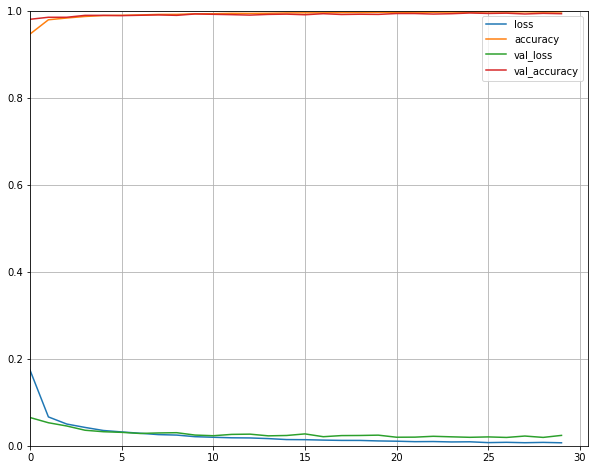

In [ ]:
#learning curve
pd.DataFrame(history2.history).plot(figsize=(10,8))
plt.grid(True)
plt.ylim(0,1)
plt.xlim(0,)
plt.show()

In [ ]:
#evaluation
model2.evaluate(X_test, y_test)

219/219 [==============================] - 1s 6ms/step - loss: 0.0283 - accuracy: 0.9900


[0.02827921137213707, 0.9900000095367432]

### 99% accuracy, impresive but curious what the variance looks like...

In [ ]:
#saving model
from tensorflow.keras.models import Model
from tensorflow.keras.models import load_model
model2.save("CNN_model")

## Building Convolutional neural network with data augmentation

In [ ]:
#reshaping data to be original image shape
X_train =X_train.reshape(-1, 28,28,1) 
X_test = X_test.reshape(-1, 28,28,1)
X_valid = X_valid.reshape(-1, 28,28,1)

In [ ]:
#model 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Dense,
    Conv2D,
    MaxPool2D,
    Flatten,
    Dropout,
    BatchNormalization,
)

model3 = Sequential([
    Conv2D(75, (3, 3), strides=1, padding="same", activation="relu", input_shape=(28, 28, 1)),
    BatchNormalization(),
    MaxPool2D((2, 2), strides=2, padding="same"),
    Conv2D(50, (3, 3), strides=1, padding="same", activation="relu"),
    Dropout(0.2),
    BatchNormalization(),
    MaxPool2D((2, 2), strides=2, padding="same"),
    Conv2D(25, (3, 3), strides=1, padding="same", activation="relu"),
    BatchNormalization(),
    MaxPool2D((2, 2), strides=2, padding="same"),
    Flatten(),
    Dense(units=512, activation="relu"),
    Dropout(0.3),
    Dense(units=10, activation="softmax")
])

In [ ]:
#making data generator 
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
    zoom_range=0.05,  # Randomly zoom image
    width_shift_range=0.05,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.05,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=False,  # Don't randomly flip images horizontally
    vertical_flip=False, # Don't randomly flip images vertically
)  

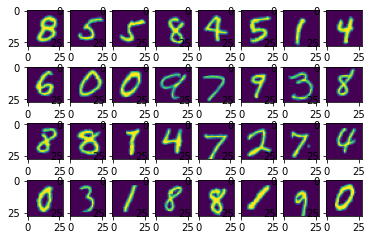

In [ ]:
#quick look at generated images
batch_size = 32
img_iter = datagen.flow(X_train, y_train, batch_size=batch_size)

x, y = img_iter.next()
fig, ax = plt.subplots(nrows=4, ncols=8)
for i in range(batch_size):
    image = x[i]
    ax.flatten()[i].imshow(np.squeeze(image))
plt.show()

In [ ]:
datagen.fit(X_train)

In [ ]:
model3.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#training model
history3 = model3.fit(img_iter,
            epochs=20,
            steps_per_epoch=len(X_train)/batch_size, # Run same number of steps we would if we were not using a generator.
            validation_data=(X_valid, y_valid))

Epoch 1/20
1812/1812 [==============================] - 28s 15ms/step - loss: 0.1633 - accuracy: 0.9520 - val_loss: 0.1147 - val_accuracy: 0.9682
Epoch 2/20
1812/1812 [==============================] - 30s 17ms/step - loss: 0.0820 - accuracy: 0.9783 - val_loss: 0.1537 - val_accuracy: 0.9638
Epoch 3/20
1812/1812 [==============================] - 25s 14ms/step - loss: 0.0685 - accuracy: 0.9825 - val_loss: 0.0600 - val_accuracy: 0.9836
Epoch 4/20
1812/1812 [==============================] - 24s 13ms/step - loss: 0.0646 - accuracy: 0.9835 - val_loss: 0.0746 - val_accuracy: 0.9812
Epoch 5/20
1812/1812 [==============================] - 25s 14ms/step - loss: 0.0598 - accuracy: 0.9856 - val_loss: 0.0248 - val_accuracy: 0.9940
Epoch 6/20
1812/1812 [==============================] - 25s 14ms/step - loss: 0.0549 - accuracy: 0.9860 - val_loss: 0.0263 - val_accuracy: 0.9934
Epoch 7/20
1812/1812 [==============================] - 25s 14ms/step - loss: 0.0480 - accuracy: 0.9873 - val_loss: 0.0319 -

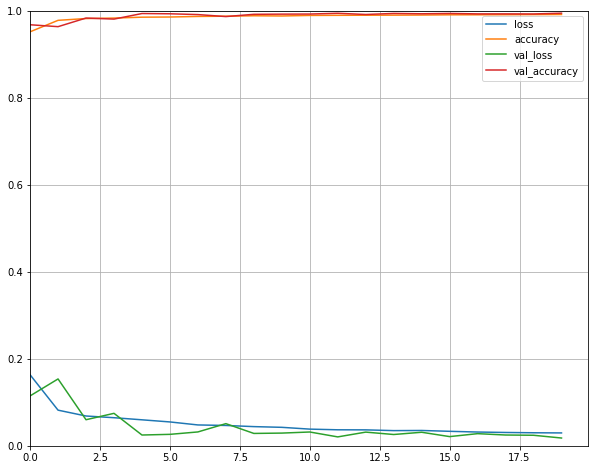

In [ ]:
#learning curves
pd.DataFrame(history3.history).plot(figsize=(10,8))
plt.grid(True)
plt.ylim(0,1)
plt.xlim(0,)
plt.show()

In [ ]:
#evaluation
model3.evaluate(X_test, y_test)

219/219 [==============================] - 1s 3ms/step - loss: 0.0236 - accuracy: 0.9939


[0.02360602654516697, 0.9938571453094482]

### 99.39% accuracy, slightly better than the CNN model, but I bet the variance is much higher

In [ ]:
#saving model
model3.save("/content/google_drive/MyDrive/Colab Notebooks/digits_recognition/CNN_augmentation_model")